# Mall_customer

Data Exploring and Visualization

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df= pd.read_csv('Mall_Customers.csv')

In [53]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Gender vs Spending score')

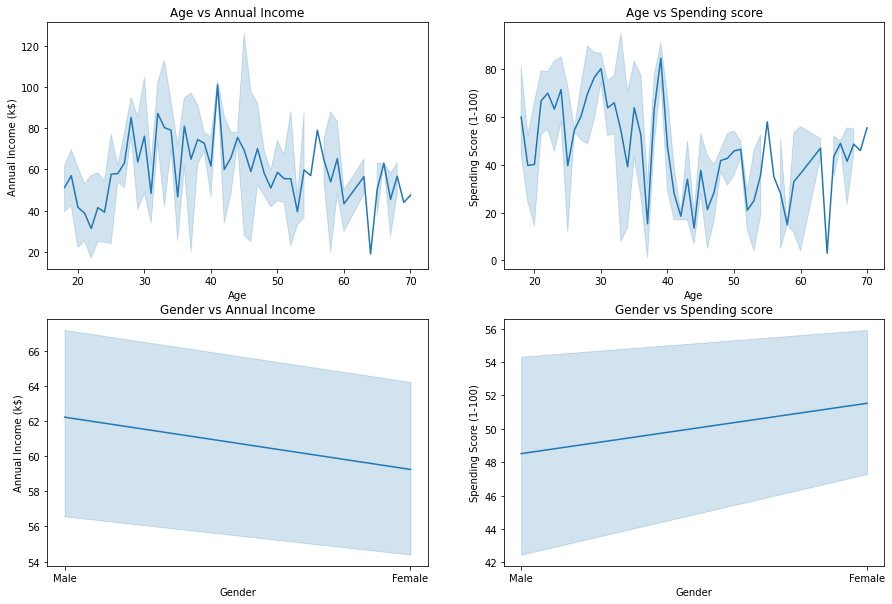

In [54]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.lineplot(x='Age',y='Annual Income (k$)',data=df)
plt.title('Age vs Annual Income')

plt.subplot(2,2,2)
sns.lineplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Age vs Spending score')

plt.subplot(2,2,3)
sns.lineplot(x='Gender',y='Annual Income (k$)',data=df)
plt.title("Gender vs Annual Income")

plt.subplot(2,2,4)
sns.lineplot(x='Gender',y='Spending Score (1-100)',data=df)
plt.title("Gender vs Spending score")

> i dont find any solid relationship between age and annual income

> but if we look carefully at spending vs age graph as age increasing spending score decreases

> If we see The Gender vs Annual income Graph overall annual income of male is greater then female

> On the other hand overall spending score of female is more the male in gender vs spending score graph

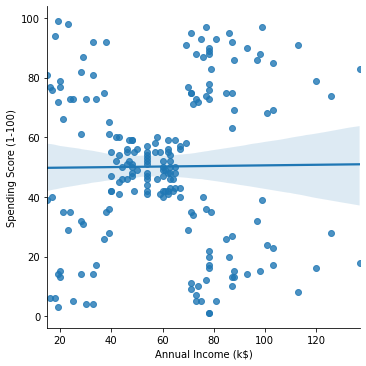

In [55]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

I dont see any relationin them

# Data Cleaning

In [91]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster1                  0
cluster2                  0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


we need to use KMean Cluster but we need to find how many cluster are to be formed

So we use the elbow curve method and take the no. where Elbow breaks

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


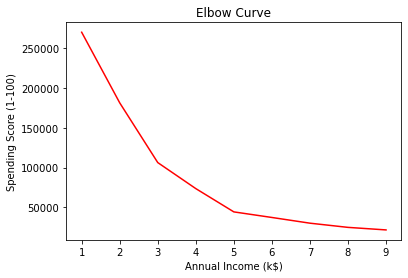

In [58]:
from sklearn.cluster import KMeans

x = df[['Annual Income (k$)','Spending Score (1-100)']]

score1=[]
for i in range(1,10):
    km = KMeans(n_clusters = i, random_state=101)
    km.fit(x)
    score1.append(km.inertia_)

plt.plot(range(1,10),score1,color='red')
plt.title('Elbow Curve')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


The elbow breaks at 5. So we will make 5 clusters

# Model Building

In [59]:
km = KMeans(n_clusters=5,random_state=101)
km_predict = km.fit_predict(x)

In [60]:
df['cluster1'] = km_predict
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [61]:
df['cluster1'].unique()

array([4, 3, 0, 2, 1])

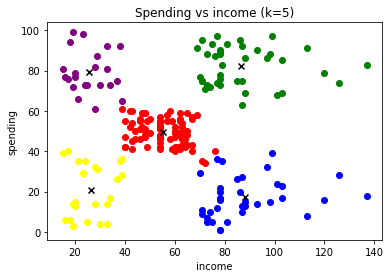

In [62]:
df0 = df[df['cluster1']==0]
df1 = df[df['cluster1']==1]
df2 = df[df['cluster1']==2]
df3 = df[df['cluster1']==3]
df4 = df[df['cluster1']==4]

plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],color='red')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='blue')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='purple')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='center')

plt.title('Spending vs income (k=5)')
plt.xlabel('income')
plt.ylabel('spending')
plt.show()